# DECISION TREE BILLBOARD TOP


Fuente: https://www.aprendemachinelearning.com/arbol-de-decision-en-python-clasificacion-y-prediccion/

Ganancia de información

    Se utiliza en variables categóricas. Intenta estimar la información que aporta cada atributo.
    La aleatoriedad de incertidumbre de cada atributo se denomina entropía.
    Al medir la entropía de cada atributo, se puede calcular la ganancia de información del arbol. 
    Se busca maximizar la ganancia de información.

Se trabajará una base de datos con atributos relacionados a las canciones que lograron alcanzar el top 1 en Billboard.

Importar librerías para analizar y limpiar los datos.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


Cargar los datos del csv 

In [4]:
artistas_billboard = pd.read_csv('artists_billboard_fix3.csv')

Explorar el dataset

In [11]:
print(artistas_billboard.shape)
artistas_billboard.head()

(635, 11)


,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0


Analizar la variable dependiente: top

In [14]:
artistas_billboard.groupby('top').size()

top
0    494
1    141
dtype: int64

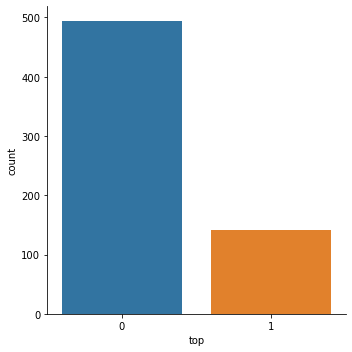

In [17]:
sb.catplot(x='top', data=artistas_billboard, kind="count")

Se debe compensar o balancear la diferencia entre los registros con top 0 y top 1

Graficar las variables independientes para observar su presencia

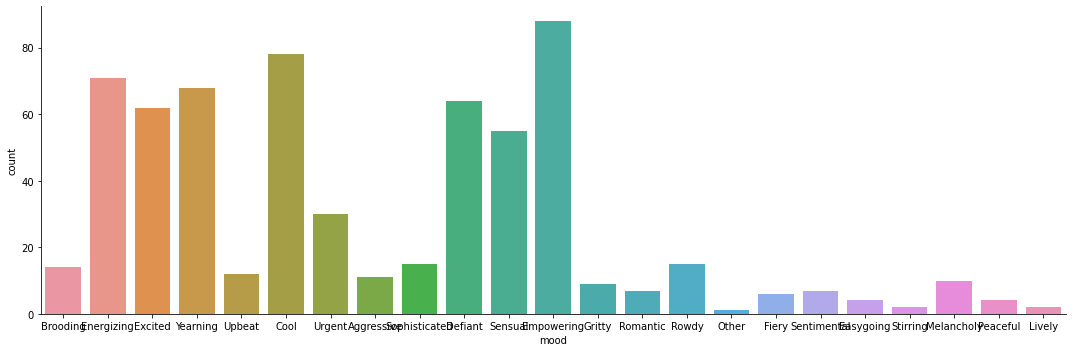

In [20]:
sb.catplot(x='mood', data=artistas_billboard, kind="count", aspect= 3)

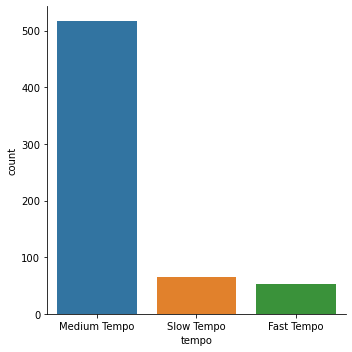

In [21]:
sb.catplot(x='tempo', data=artistas_billboard, kind='count')

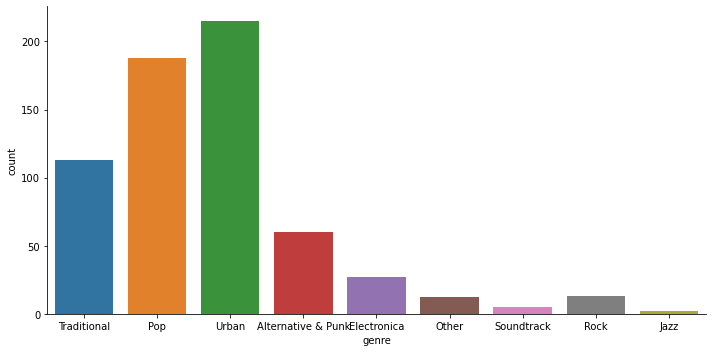

In [24]:
sb.catplot(x='genre', data=artistas_billboard, kind='count', aspect=2)

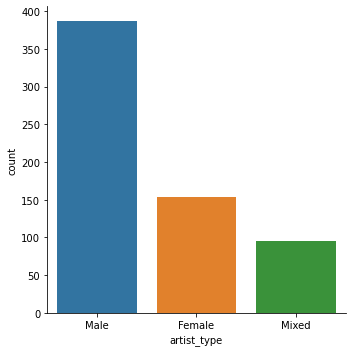

In [25]:
sb.catplot(x='artist_type', data=artistas_billboard, kind='count')

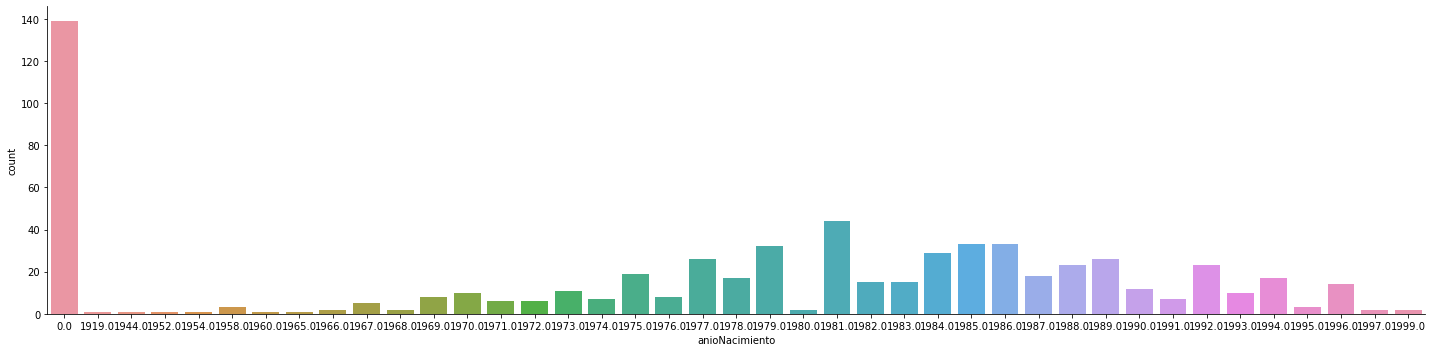

In [28]:
sb.catplot(x='anioNacimiento', data=artistas_billboard, kind='count', aspect=4)

Desconocemos el anio de nacimiento de casi 140 artistas de las canciones.

Graficar el conteo del tipo de tempo según si alcanzan el top

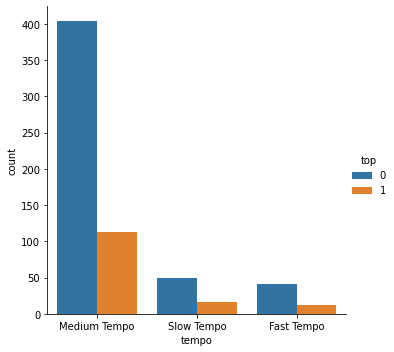

In [29]:
sb.catplot(x='tempo', data=artistas_billboard, hue='top', kind='count')

Limpieza de los datos

Reemplazar los 0 por None en anioNacimiento

In [30]:
def anio_fix(anio):
    if anio == 0:
        return None
    return anio

artistas_billboard['anioNacimiento'] = artistas_billboard.apply(lambda x: anio_fix(x['anioNacimiento']), axis=1)

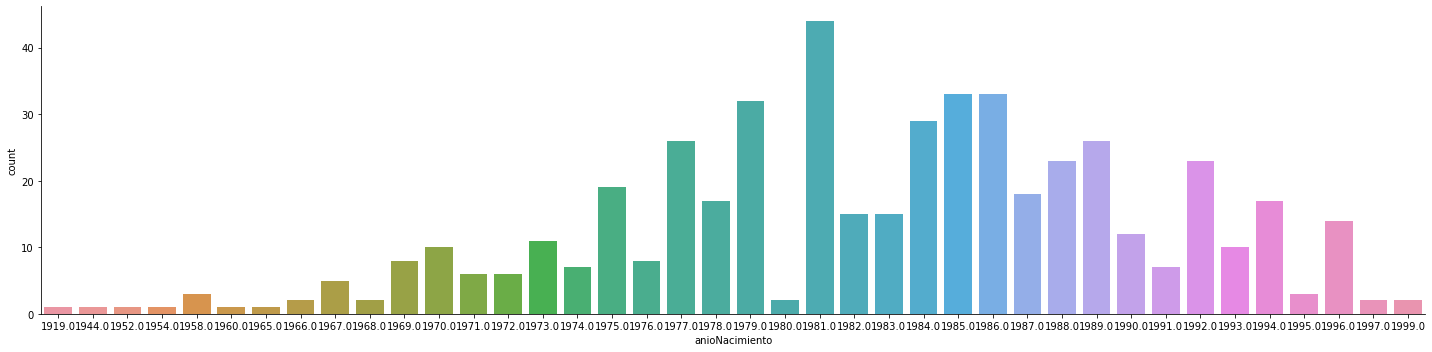

In [32]:
sb.catplot(x='anioNacimiento', data=artistas_billboard, kind='count', aspect=4)

Agregar una serie que contenga la edad computada del artista cuando la canción alcanzó top 1

In [33]:
artistas_billboard.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,NaN


In [34]:
def calcula_edad(nac, top):
    anio_top_str = str(top)
    anio_top = anio_top_str[:4]
    if nac == None:
        return None
    return int(anio_top) - nac

artistas_billboard['edad_en_billboard'] = artistas_billboard.apply(lambda x: calcula_edad(x['anioNacimiento'], x['chart_date']), axis=1)

In [35]:
artistas_billboard.tail()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento,edad_en_billboard
630,630,The Blower's Daughter,MATT McANDREW,Romantic,Medium Tempo,Pop,Male,20141220,881.0,0,1990.0,24.0
631,631,First Love,JENNIFER LOPEZ,Peaceful,Slow Tempo,Pop,Female,20140705,238.0,0,1970.0,44.0
632,632,No One,ALICIA KEYS,Sophisticated,Slow Tempo,Urban,Female,20071201,157.0,1,1981.0,26.0
633,633,She Came To Give It To You,USHER featuring NICKI MINAJ,Energizing,Medium Tempo,Urban,Mixed,20140913,209.0,0,1982.0,32.0
634,634,Wasted Love,MATT McANDREW,Sentimental,Slow Tempo,Pop,Male,20150103,226.0,0,1990.0,25.0


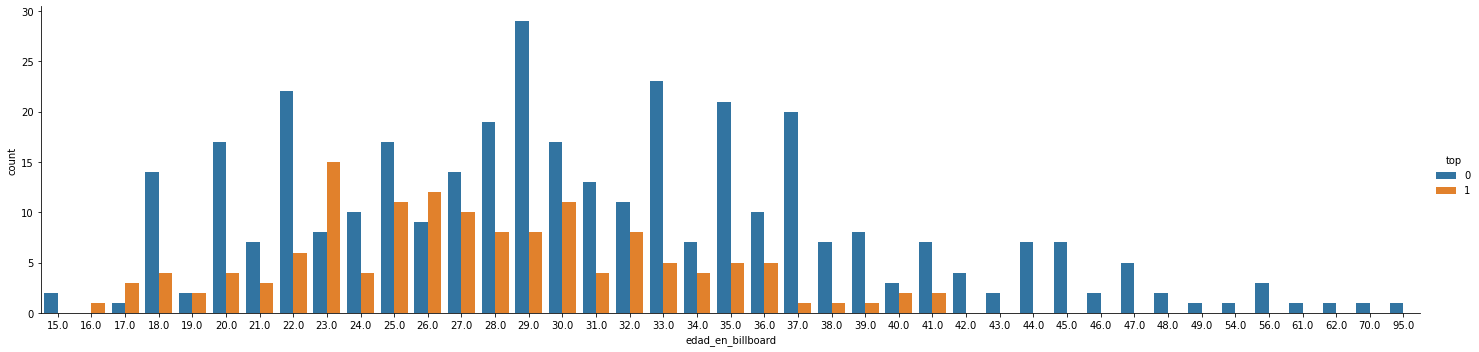

In [36]:
sb.catplot(x='edad_en_billboard', data=artistas_billboard, kind='count', hue='top', aspect=4)